# Case Study By Amrendra Kumar

In [28]:
# Rainfall Trends in India Analysis with Python
'''Now, we will begin by loading and exploring the dataset which contains rainfall data for India from 1901 to 2015. Each record provides 
monthly, seasonal, and annual rainfall measurements. This data is critical for understanding long-term trends, seasonal variations, and extreme weather events'''

#import Library

import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import pearsonr
from sklearn.ensemble import IsolationForest

In [2]:
#Load Datasets

rainfall_data = pd.read_csv("C:\\Users\\AMRENDRA KUM AR\\OneDrive\\Desktop\\CSV Datas\\rainfall_area-wt_India_1901-2015.csv")

print(rainfall_data.head())

  REGION  YEAR   JAN   FEB   MAR   APR   MAY    JUN    JUL    AUG    SEP  \
0  INDIA  1901  34.7  37.7  18.0  39.3  50.8  113.4  242.2  272.9  124.4   
1  INDIA  1902   7.4   4.3  19.0  43.5  48.3  108.8  284.0  199.7  201.5   
2  INDIA  1903  17.0   8.3  31.3  17.1  59.5  118.3  297.0  270.4  199.1   
3  INDIA  1904  14.4   9.6  31.8  33.1  72.4  164.8  261.0  206.4  129.6   
4  INDIA  1905  25.3  20.9  42.7  33.7  55.7   93.3  252.8  200.8  178.4   

     OCT   NOV   DEC  ANNUAL  Jan-Feb  Mar-May  Jun-Sep  Oct-Dec  
0   52.7  38.0   8.3  1032.3     72.4    108.1    752.8     99.0  
1   61.5  27.9  24.4  1030.2     11.7    110.8    794.0    113.8  
2  117.9  36.9  17.7  1190.5     25.3    107.9    884.8    172.5  
3   69.0  11.2  16.3  1019.8     24.0    137.4    761.8     96.6  
4   51.4   9.7  10.5   975.3     46.2    132.2    725.4     71.6  


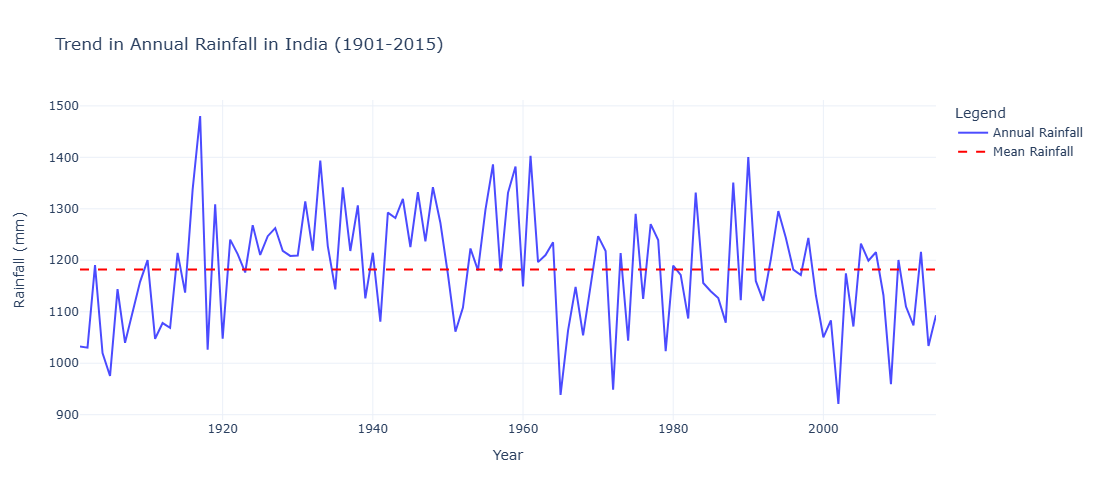

The above graph shows significant year-to-year variability in India’s annual rainfall, with no apparent long-term upward or downward trend over the century. The red dashed line indicates the mean rainfall, around which the annual rainfall oscillates. Notable peaks and troughs highlight extreme rainfall events and dry years.


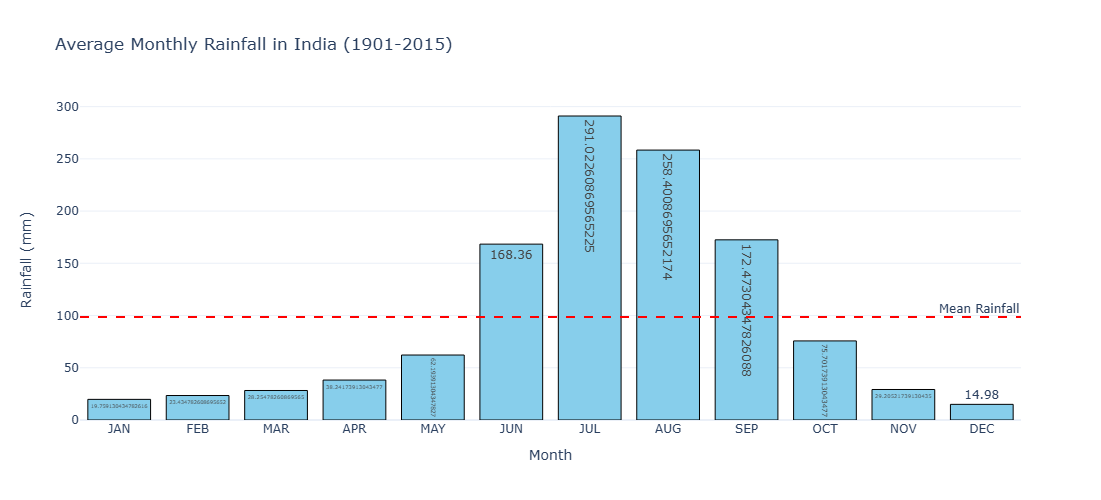

This bar chart illustrates a highly uneven distribution of rainfall across months, with July and August receiving the highest average rainfall. The red   dashed line represents the mean monthly rainfall, showing that most months receive rainfall below the average, except during the monsoon months (June to September).


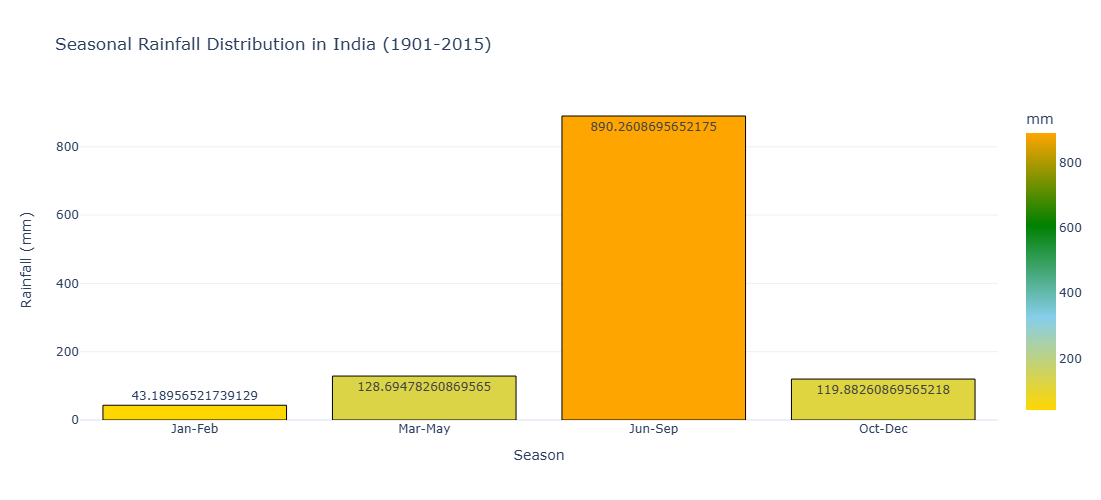

The seasonal distribution highlights the dominance of the monsoon season (June to September), which contributes the bulk of annual rainfall (around 890 mm). In contrast, the other seasons (January-February, March-May, and October-December) contribute significantly less to the annual total,which emphasizes the critical role of the monsoon.


In [27]:
# analyze trends in annual rainfall over time
annual_rainfall = rainfall_data[['YEAR', 'ANNUAL']]

fig_annual = go.Figure()
fig_annual.add_trace(go.Scatter(
    x=annual_rainfall['YEAR'],
    y=annual_rainfall['ANNUAL'],
    mode='lines',
    name='Annual Rainfall',
    line=dict(color='blue', width=2),
    opacity=0.7
))
fig_annual.add_trace(go.Scatter(
    x=annual_rainfall['YEAR'],
    y=[annual_rainfall['ANNUAL'].mean()] * len(annual_rainfall),
    mode='lines',
    name='Mean Rainfall',
    line=dict(color='red', dash='dash')
))
fig_annual.update_layout(
    title='Trend in Annual Rainfall in India (1901-2015)',
    xaxis_title='Year',
    yaxis_title='Rainfall (mm)',
    template='plotly_white',
    legend=dict(title="Legend"),
    height=500
)
fig_annual.show()
print("The above graph shows significant year-to-year variability in India’s annual rainfall, with no apparent long-term upward or downward trend over the century. The red dashed line indicates the mean rainfall, around which the annual rainfall oscillates. Notable peaks and troughs highlight extreme rainfall events and dry years.")


# identify months with the highest and lowest rainfall on average
monthly_columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
monthly_avg = rainfall_data[monthly_columns].mean()

highest_rainfall_month = monthly_avg.idxmax()
lowest_rainfall_month = monthly_avg.idxmin()

fig_monthly = px.bar(
    x=monthly_avg.index,
    y=monthly_avg.values,
    labels={'x': 'Month', 'y': 'Rainfall (mm)'},
    title='Average Monthly Rainfall in India (1901-2015)',
    text=monthly_avg.values
)
fig_monthly.add_hline(
    y=monthly_avg.mean(),
    line_dash="dash",
    line_color="red",
    annotation_text="Mean Rainfall",
    annotation_position="top right"
)
fig_monthly.update_traces(marker_color='skyblue', marker_line_color='black', marker_line_width=1)
fig_monthly.update_layout(template='plotly_white', height=500)
fig_monthly.show()
print("This bar chart illustrates a highly uneven distribution of rainfall across months, with July and August receiving the highest average rainfall. The red   dashed line represents the mean monthly rainfall, showing that most months receive rainfall below the average, except during the monsoon months (June to September).")


# seasonal rainfall distribution
seasonal_columns = ['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
seasonal_avg = rainfall_data[seasonal_columns].mean()

fig_seasonal = px.bar(
    x=seasonal_avg.index,
    y=seasonal_avg.values,
    labels={'x': 'Season', 'y': 'Rainfall (mm)'},
    title='Seasonal Rainfall Distribution in India (1901-2015)',
    text=seasonal_avg.values,
    color=seasonal_avg.values,
    color_continuous_scale=['gold', 'skyblue', 'green', 'orange']
)

fig_seasonal.update_traces(marker_line_color='black', marker_line_width=1)
fig_seasonal.update_layout(
    template='plotly_white',
    height=500,
    coloraxis_colorbar=dict(title='mm')
)
fig_seasonal.update_layout(template='plotly_white', height=500)
fig_seasonal.show()
print("The seasonal distribution highlights the dominance of the monsoon season (June to September), which contributes the bulk of annual rainfall (around 890 mm). In contrast, the other seasons (January-February, March-May, and October-December) contribute significantly less to the annual total,which emphasizes the critical role of the monsoon.")

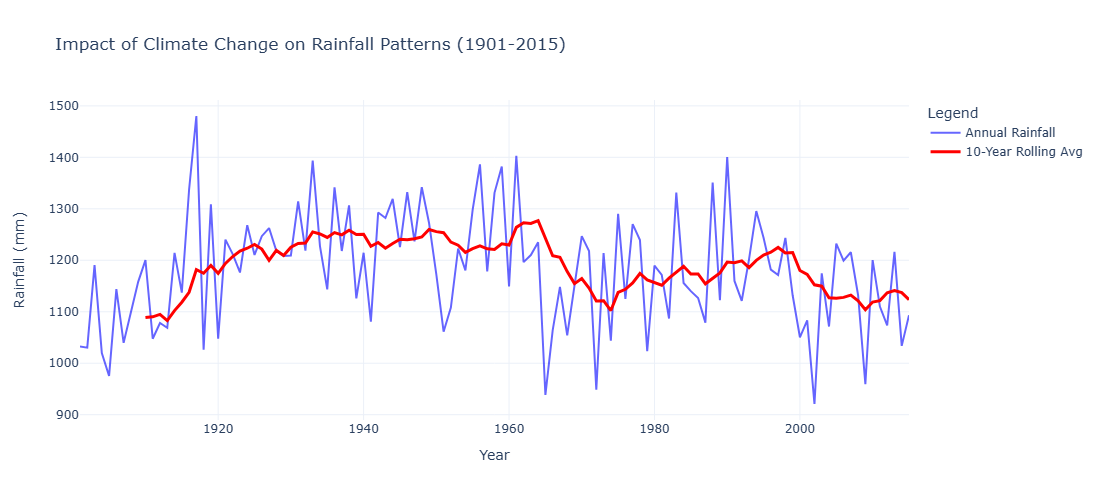

This graph shows the annual rainfall trends in India(blue line) and a 10-year rolling average (red line)to identify long-term patterns,While annual rainfall exhibits significant variability the 10-year rolling average indicates a slight downward trend post-1960 which suggests a possible impact of  climate change on rainfall distribution. Periods of higher averages in the early 20th-century contrast with more consistent but lower averages in recent decades


In [35]:
# Assessing the Impact of Climate Change in the Rainfall Trends in India
'''Now, we will calculate a 10-year rolling average of annual rainfall to identify long-term trends and smooth out short-term variations. 
This will help assess the potential impact of climate change on rainfall patterns'''

# calculating rolling averages to assess climate change impact
rainfall_data['10-Year Rolling Avg'] = rainfall_data['ANNUAL'].rolling(window=10).mean()

fig_climate_change = go.Figure()

fig_climate_change.add_trace(go.Scatter(
    x=rainfall_data['YEAR'],
    y=rainfall_data['ANNUAL'],
    mode='lines',
    name='Annual Rainfall',
    line=dict(color='blue', width=2),
    opacity=0.6
))

fig_climate_change.add_trace(go.Scatter(
    x=rainfall_data['YEAR'],
    y=rainfall_data['10-Year Rolling Avg'],
    mode='lines',
    name='10-Year Rolling Avg',
    line=dict(color='red', width=3)
))

fig_climate_change.update_layout(
    title='Impact of Climate Change on Rainfall Patterns (1901-2015)',
    xaxis_title='Year',
    yaxis_title='Rainfall (mm)',
    template='plotly_white',
    legend=dict(title="Legend"),
    height=500
)

fig_climate_change.show()
print("This graph shows the annual rainfall trends in India(blue line) and a 10-year rolling average (red line)to identify long-term patterns,While annual rainfall exhibits significant variability the 10-year rolling average indicates a slight downward trend post-1960 which suggests a possible impact of  climate change on rainfall distribution. Periods of higher averages in the early 20th-century contrast with more consistent but lower averages in recent decades")

In [42]:
# identifying drought and extreme rainfall years

mean_rainfall = rainfall_data['ANNUAL'].mean()
std_dev_rainfall = rainfall_data['ANNUAL'].std()

drought_years = rainfall_data[rainfall_data['ANNUAL'] < (mean_rainfall - 1.5 * std_dev_rainfall)]
extreme_rainfall_years = rainfall_data[rainfall_data['ANNUAL'] > (mean_rainfall + 1.5 * std_dev_rainfall)]

# correlating seasonal rainfall with annual rainfall totals
seasonal_columns = ['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
seasonal_correlations = {
    season: pearsonr(rainfall_data[season], rainfall_data['ANNUAL'])[0] for season in seasonal_columns
}

# displaying results for drought/extreme years and correlations
drought_years_summary = drought_years[['YEAR', 'ANNUAL']].reset_index(drop=True)
extreme_rainfall_years_summary = extreme_rainfall_years[['YEAR', 'ANNUAL']].reset_index(drop=True)
seasonal_correlations_summary = pd.DataFrame.from_dict(seasonal_correlations, orient='index', columns=['Correlation'])
print("The analysis identifies five significant drought years (e.g., 2002 and 2009) and seven extreme rainfall years (e.g., 1917 and 1990) based on deviations from the mean annual rainfall. Seasonal rainfall correlations with annual totals reveal that the monsoon season (June-September) has the strongest correlation (0.93)")

drought_years_summary, extreme_rainfall_years_summary, seasonal_correlations_summary

The analysis identifies five significant drought years (e.g., 2002 and 2009) and seven extreme rainfall years (e.g., 1917 and 1990) based on deviations from the mean annual rainfall. Seasonal rainfall correlations with annual totals reveal that the monsoon season (June-September) has the strongest correlation (0.93)


(   YEAR  ANNUAL
 0  1905   975.3
 1  1965   938.4
 2  1972   948.5
 3  2002   920.8
 4  2009   959.3,
    YEAR  ANNUAL
 0  1917  1480.3
 1  1933  1393.5
 2  1956  1386.2
 3  1959  1382.1
 4  1961  1403.0
 5  1988  1351.0
 6  1990  1400.6,
          Correlation
 Jan-Feb     0.228913
 Mar-May     0.313057
 Jun-Sep     0.930027
 Oct-Dec     0.531648)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



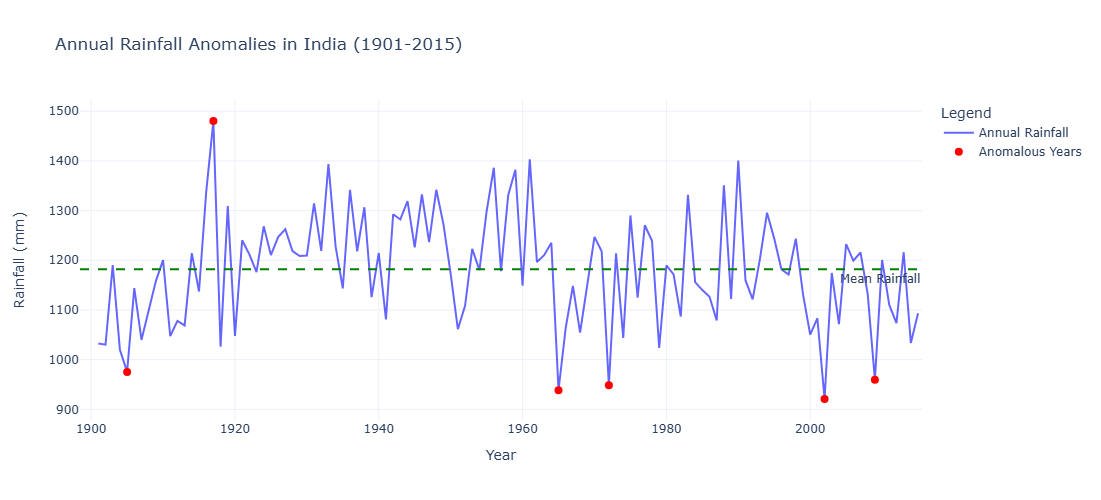

This graph highlights years with significant rainfall anomalies, where annual rainfall deviated substantially from the mean. Drought years (e.g., 1905, 1965, 2002) and extreme rainfall years (e.g., 1917, 1961) are marked as red points, which showcase outliers in rainfall patterns. 


In [43]:
#Detecting Anomalies in the Rainfall Trends in India
'''Now, using an Isolation Forest algorithm, we will identify anomalies in both annual and monthly rainfall. 
This will highlight specific years or months with unusual rainfall patterns. Let’s start with identifying anomalies in annual rainfall:'''

# detect anomalous rainfall years based on annual data

isolation_forest = IsolationForest(contamination=0.05, random_state=42)
rainfall_data['Annual_Anomaly'] = isolation_forest.fit_predict(rainfall_data[['ANNUAL']])

# identify anomalies in annual rainfall
annual_anomalies = rainfall_data[rainfall_data['Annual_Anomaly'] == -1]

# detect anomalous months based on monthly data
monthly_data = rainfall_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
monthly_anomalies = isolation_forest.fit_predict(monthly_data)

# add anomaly detection results for months
rainfall_data['Monthly_Anomaly'] = monthly_anomalies
monthly_anomalies_df = rainfall_data[rainfall_data['Monthly_Anomaly'] == -1][['YEAR'] + monthly_columns]

fig_annual_anomalies = go.Figure()

fig_annual_anomalies.add_trace(go.Scatter(
    x=rainfall_data['YEAR'],
    y=rainfall_data['ANNUAL'],
    mode='lines',
    name='Annual Rainfall',
    line=dict(color='blue', width=2),
    opacity=0.6
))

fig_annual_anomalies.add_trace(go.Scatter(
    x=annual_anomalies['YEAR'],
    y=annual_anomalies['ANNUAL'],
    mode='markers',
    name='Anomalous Years',
    marker=dict(color='red', size=8, symbol='circle')
))

fig_annual_anomalies.add_hline(
    y=rainfall_data['ANNUAL'].mean(),
    line_dash='dash',
    line_color='green',
    annotation_text='Mean Rainfall',
    annotation_position='bottom right'
)

fig_annual_anomalies.update_layout(
    title='Annual Rainfall Anomalies in India (1901-2015)',
    xaxis_title='Year',
    yaxis_title='Rainfall (mm)',
    template='plotly_white',
    legend=dict(title="Legend"),
    height=500
)

fig_annual_anomalies.show()
print("This graph highlights years with significant rainfall anomalies, where annual rainfall deviated substantially from the mean. Drought years (e.g., 1905, 1965, 2002) and extreme rainfall years (e.g., 1917, 1961) are marked as red points, which showcase outliers in rainfall patterns. ")

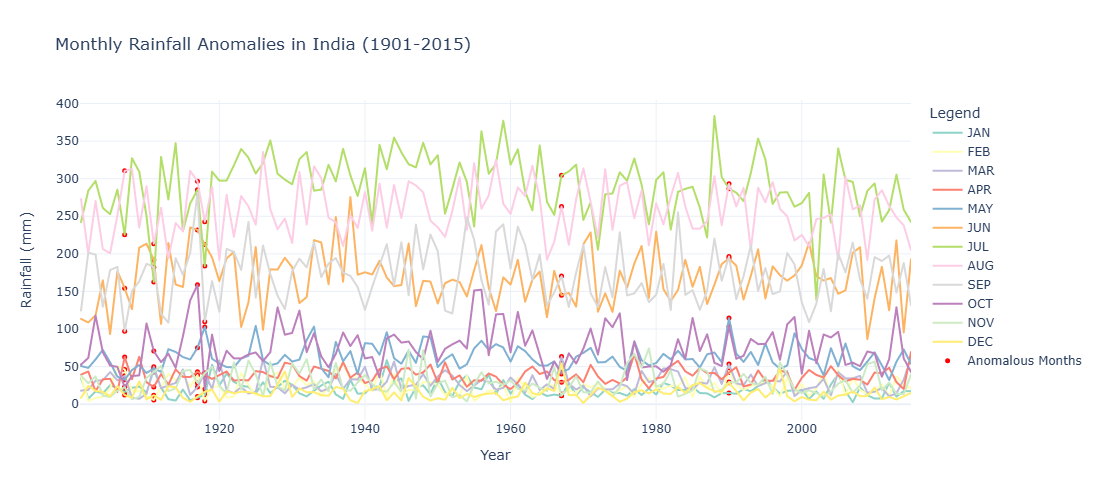

This graph underscores the uneven distribution and high dependence on monsoonal rainfall for India’s water resources.


In [44]:
#Now, let’s identify anomalies in monthly rainfall:

# preparing data for monthly anomalies

monthly_anomalies = []
for column in monthly_columns:
    for _, row in monthly_anomalies_df.iterrows():
        monthly_anomalies.append({'Year': row['YEAR'], 'Month': column, 'Rainfall': row[column]})

monthly_anomalies_df_long = pd.DataFrame(monthly_anomalies)

fig_monthly_anomalies = px.line(
    rainfall_data,
    x='YEAR',
    y=monthly_columns,
    labels={'YEAR': 'Year', 'value': 'Rainfall (mm)', 'variable': 'Month'},
    title='Monthly Rainfall Anomalies in India (1901-2015)',
    color_discrete_sequence=px.colors.qualitative.Set3
)

fig_monthly_anomalies.add_trace(go.Scatter(
    x=monthly_anomalies_df_long['Year'],
    y=monthly_anomalies_df_long['Rainfall'],
    mode='markers',
    name='Anomalous Months',
    marker=dict(color='red', size=5, symbol='circle')
))

fig_monthly_anomalies.update_layout(
    template='plotly_white',
    legend=dict(title="Legend"),
    height=500
)

fig_monthly_anomalies.show()
print("This graph underscores the uneven distribution and high dependence on monsoonal rainfall for India’s water resources.")

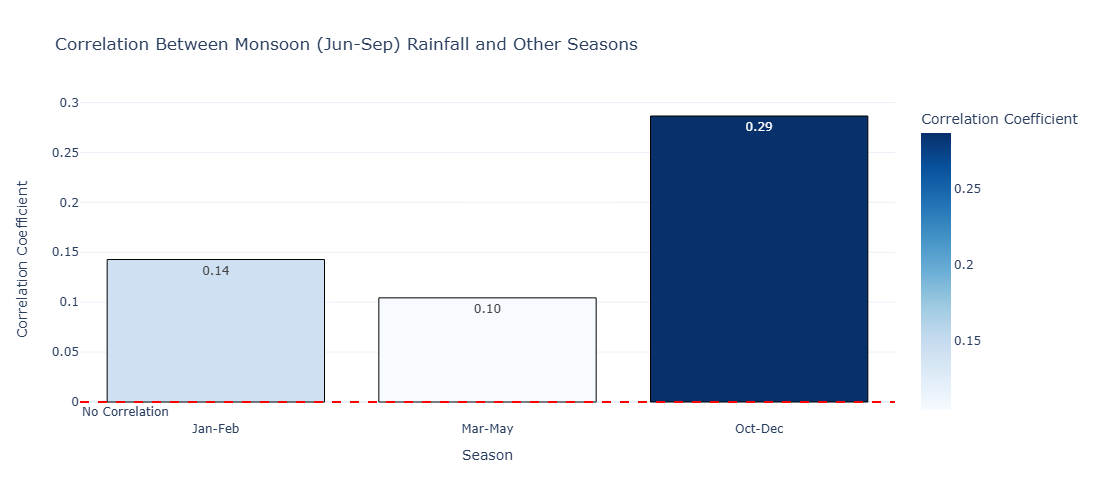

This graph shows the correlation between monsoon rainfall and rainfall during other seasons. The October-December season has the highest correlation (0.29), which suggests a moderate relationship, possibly due to the post-monsoon retreat rains


In [45]:
#Correlating Seasonal Rainfall with Annual Totals
'''Now, we will calculate the correlation coefficients between seasonal rainfall and annual rainfall totals to understand 
how much each season contributes to the overall yearly rainfall:'''

# correlation analysis between monsoon (Jun-Sep) rainfall and other seasons

seasonal_columns = ['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
monsoon_column = 'Jun-Sep'
relationships = {}

for season in seasonal_columns:
    if season != monsoon_column:
        corr, _ = pearsonr(rainfall_data[monsoon_column], rainfall_data[season])
        relationships[season] = corr

correlation_data = pd.DataFrame({
    'Season': list(relationships.keys()),
    'Correlation Coefficient': list(relationships.values())
})

fig = px.bar(
    correlation_data,
    x='Season',
    y='Correlation Coefficient',
    title='Correlation Between Monsoon (Jun-Sep) Rainfall and Other Seasons',
    labels={'Season': 'Season', 'Correlation Coefficient': 'Correlation Coefficient'},
    text='Correlation Coefficient',
    color='Correlation Coefficient',
    color_continuous_scale='Blues'
)

fig.add_hline(
    y=0,
    line_dash="dash",
    line_color="red",
    annotation_text="No Correlation",
    annotation_position="bottom left"
)

fig.update_traces(marker_line_color='black', marker_line_width=1, texttemplate='%{text:.2f}')
fig.update_layout(
    template='plotly_white',
    height=500
)

fig.show()
print("This graph shows the correlation between monsoon rainfall and rainfall during other seasons. The October-December season has the highest correlation (0.29), which suggests a moderate relationship, possibly due to the post-monsoon retreat rains")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



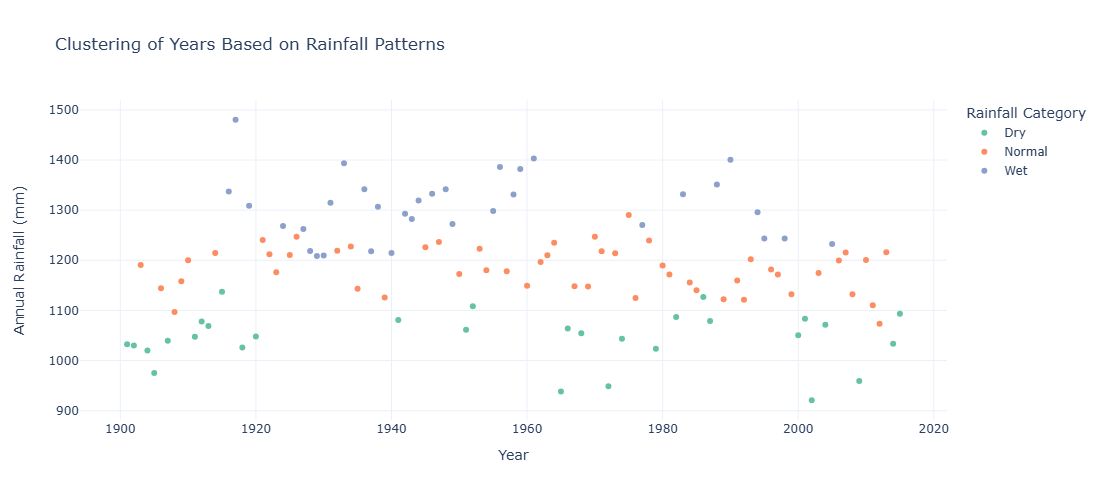

The clusters reveal that most years fall into the Normal category, while Wet years (above-normal rainfall) are sporadically distributed throughout the timeline, with a concentration in the early and mid-20th century.


In [46]:
#Grouping Years Based on Rainfall Patterns
'''Now, by applying k-means clustering, we will group years into three categories: Dry, 
Normal, and Wet, based on rainfall patterns:'''

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# prepare data for clustering
rainfall_features = rainfall_data[['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec', 'ANNUAL']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(rainfall_features)

# perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
rainfall_data['Rainfall_Cluster'] = kmeans.fit_predict(scaled_features)

# map cluster labels to categories (e.g., Dry, Normal, Wet)
cluster_labels = {0: 'Dry', 1: 'Normal', 2: 'Wet'}
rainfall_data['Rainfall_Category'] = rainfall_data['Rainfall_Cluster'].map(cluster_labels)

fig = px.scatter(
    rainfall_data,
    x='YEAR',
    y='ANNUAL',
    color='Rainfall_Category',
    title='Clustering of Years Based on Rainfall Patterns',
    labels={'YEAR': 'Year', 'ANNUAL': 'Annual Rainfall (mm)', 'Rainfall_Category': 'Rainfall Category'},
    color_discrete_sequence=px.colors.qualitative.Set2,
    hover_data={'Rainfall_Cluster': True, 'Rainfall_Category': True}
)

fig.update_layout(
    template='plotly_white',
    legend_title='Rainfall Category',
    height=500
)

fig.show()
print("The clusters reveal that most years fall into the Normal category, while Wet years (above-normal rainfall) are sporadically distributed throughout the timeline, with a concentration in the early and mid-20th century.")

18:36:24 - cmdstanpy - INFO - Chain [1] start processing
18:36:24 - cmdstanpy - INFO - Chain [1] done processing
C:\ProgramData\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



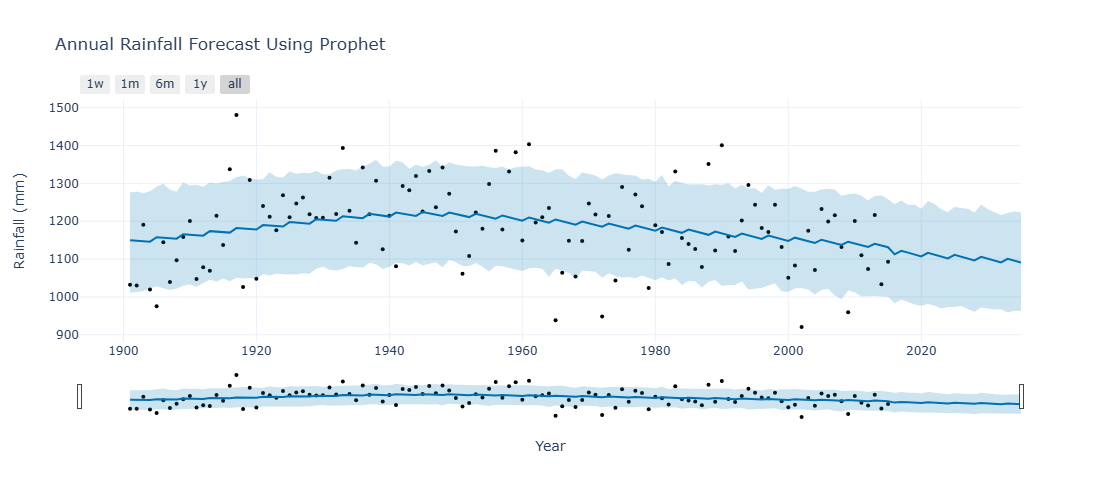

The blue line represents the model’s forecast trend, while the shaded area indicates the confidence interval. The trend reveals a slight decline in annual rainfall over time, with notable year-to-year variability (black dots representing actual data points). The model captures the variability well but highlights that future rainfall may continue to slightly decrease, which emphasizes the need for adaptive strategies to manage potential water resource challenges.


In [19]:
#Forecasting Future Rainfall
#Finally, we will use the Prophet library to forecast annual rainfall for the next 20 years:

rainfall_data['DATE'] = pd.to_datetime(rainfall_data['YEAR'], format='%Y')
annual_rainfall_ts = rainfall_data.set_index('DATE')['ANNUAL']

# use: pip install prophet

from prophet import Prophet
# Prepare the data for Prophet
prophet_data = annual_rainfall_ts.reset_index()
prophet_data.columns = ['ds', 'y']

from prophet.plot import plot_plotly, plot_components_plotly

prophet_model = Prophet()
prophet_model.fit(prophet_data)

# create a future dataframe for the next 20 years
future = prophet_model.make_future_dataframe(periods=20, freq='Y')
forecast = prophet_model.predict(future)

fig_forecast = plot_plotly(prophet_model, forecast)

fig_forecast.update_layout(
    title='Annual Rainfall Forecast Using Prophet',
    xaxis_title='Year',
    yaxis_title='Rainfall (mm)',
    template='plotly_white',
    height=500
)

fig_forecast.show()
print("The blue line represents the model’s forecast trend, while the shaded area indicates the confidence interval. The trend reveals a slight decline in annual rainfall over time, with notable year-to-year variability (black dots representing actual data points). The model captures the variability well but highlights that future rainfall may continue to slightly decrease, which emphasizes the need for adaptive strategies to manage potential water resource challenges.")